In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Packages

In [ ]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;

### Import Datasets

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/DataSets/Lab2Regression/train.csv')
test = pd.read_csv('/content/drive/MyDrive/DataSets/Lab2Regression/test.csv')

In [ ]:
train.describe()


,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000
mean,180167.500000,6.337376,3.043881,2.456482,0.689390,2.203813,13.822071,0.568086,0.327797,18.972706,28180.333442,0.564839,0.277394,0.504807,0.504832,0.503191,99.614729
std,104020.187637,3.307980,0.784676,1.488992,1.214732,1.084293,4.614792,0.495343,0.469411,10.212912,5968.874074,0.495779,0.447713,0.499978,0.499977,0.499991,29.939435
min,0.000000,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,90083.750000,3.720000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.320000
50%,180167.500000,5.780000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.810000
75%,270251.250000,8.400000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,33858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,360335.000000,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


according to above there are no missing values.

In [ ]:
features = train.columns[1:-1]
X_train = train[features]
Y_train = train['cost']
X_test = test[features]


### Check varience of the features

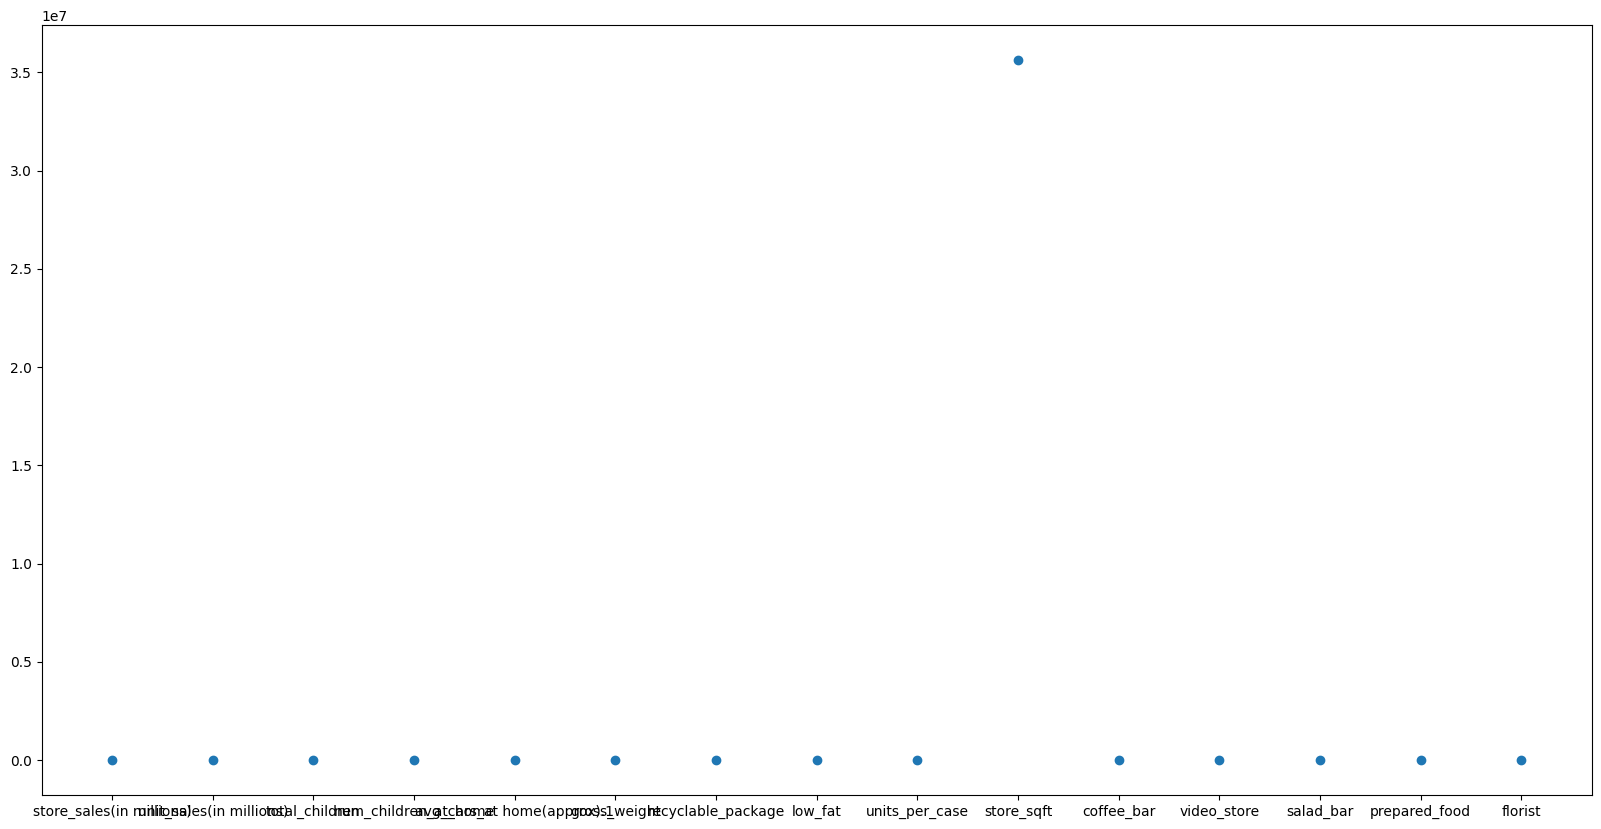

In [ ]:
#feature varience plot
plt.figure(figsize=(20,10))
plt.scatter(X_train.columns, X_train.var())

since most of the feature varience is ~0 no features removed

### Correlation check

In [ ]:
import seaborn as sns;

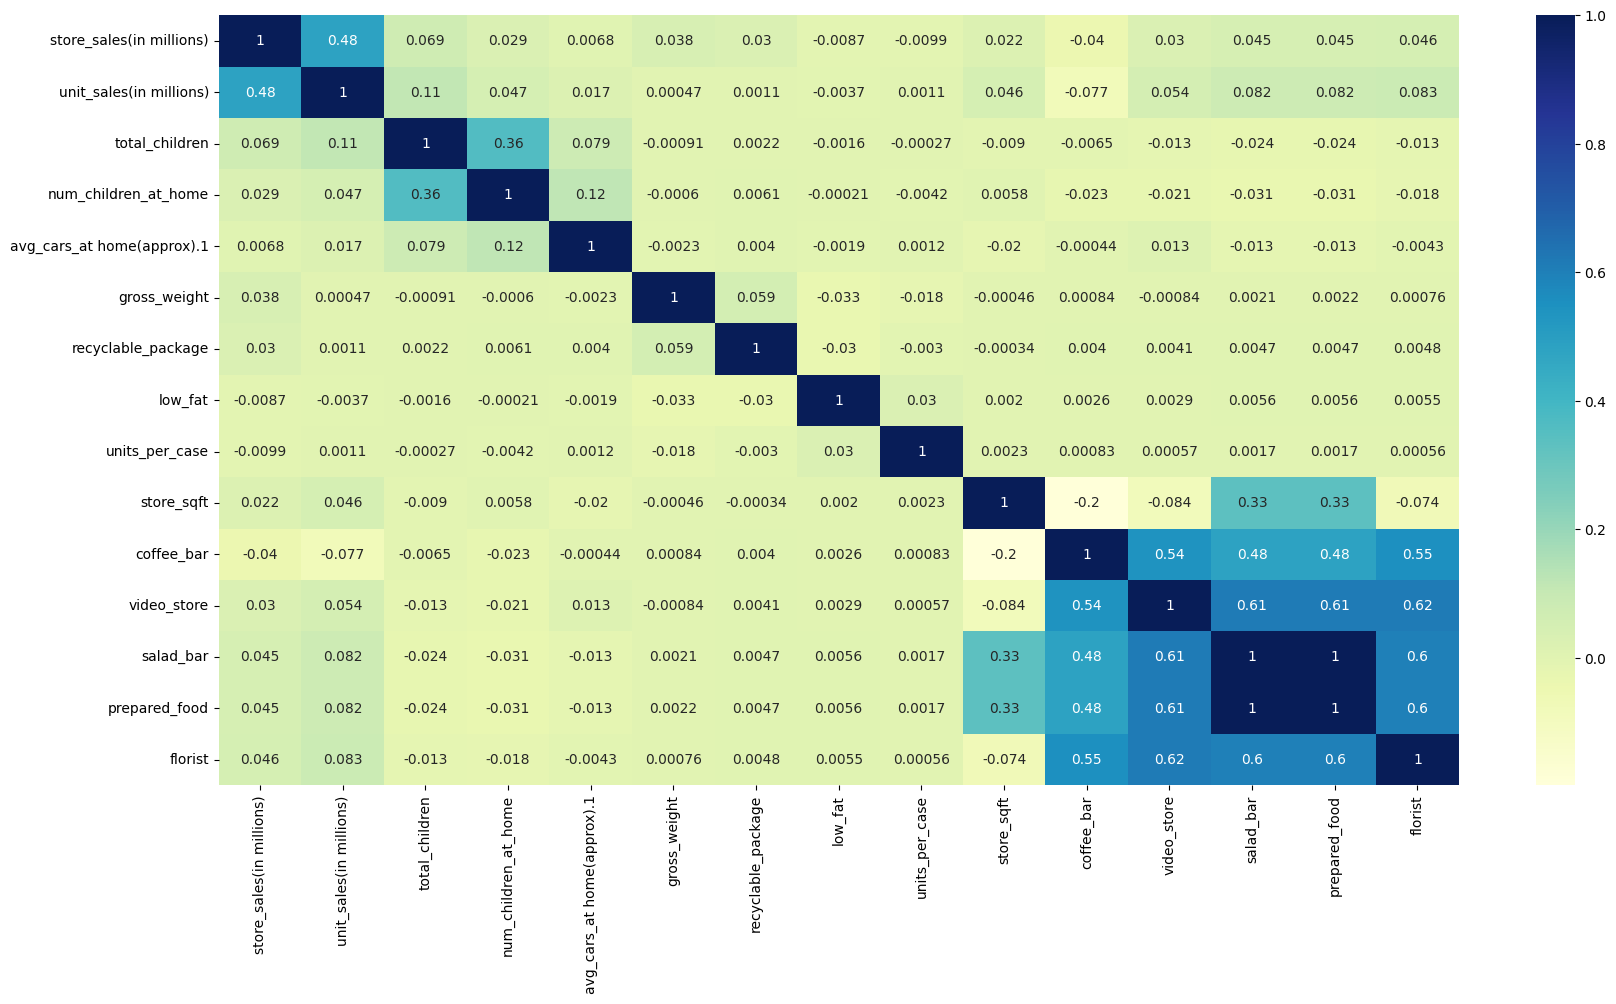

In [ ]:
plt.figure(figsize=(20,10))
dataplot = sns.heatmap(X_train.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.9)
len(set(corr_features))

1

In [ ]:
X_train = X_train.drop(corr_features, axis = 1)
X_test = X_test.drop(corr_features, axis = 1)

In [ ]:
final_columns = X_train.columns

In [ ]:
from sklearn.preprocessing import RobustScaler;

transformer = RobustScaler().fit(X_train)
X_train = transformer.transform(X_train)

In [29]:
X_test_scaled = transformer.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns = final_columns)


In [ ]:
X_train.describe()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,florist
count,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000
mean,0.119098,0.043881,0.152161,0.689390,0.101906,0.027794,-0.431914,0.327797,-0.057072,0.047378,-0.435161,0.277394,-0.495193,-0.496809
std,0.706833,0.784676,0.496331,1.214732,0.542147,0.577571,0.495343,0.469411,0.567384,0.581478,0.495779,0.447713,0.499978,0.499991
min,-1.126068,-2.000000,-0.666667,0.000000,-1.000000,-0.951189,-1.000000,0.000000,-1.055556,-0.718461,-1.000000,0.000000,-1.000000,-1.000000
25%,-0.440171,0.000000,-0.333333,0.000000,-0.500000,-0.486859,-1.000000,0.000000,-0.555556,-0.399513,-1.000000,0.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.559829,1.000000,0.666667,1.000000,0.500000,0.513141,0.000000,1.000000,0.444444,0.600487,0.000000,1.000000,0.000000,0.000000
max,3.662393,3.000000,1.000000,5.000000,1.000000,1.038798,0.000000,1.000000,0.888889,1.169216,0.000000,1.000000,0.000000,0.000000


In [ ]:
from sklearn.model_selection import train_test_split;

#split the dataset
X_train_final,  X_valid,Y_train_final, Y_valid = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 0)

### XGBoost Regressor

In [ ]:
import xgboost as xgb

In [ ]:
X_train_final.shape, Y_train_final.shape, X_valid.shape, Y_valid.shape

((288268, 14), (288268,), (72068, 14), (72068,))

In [ ]:
dtrain = xgb.DMatrix(X_train_final, label=Y_train_final)
dvalid = xgb.DMatrix(X_valid, label=Y_valid)

In [ ]:
from sklearn.metrics import mean_squared_error;
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
}

model = xgb.XGBRegressor(objective='reg:squarederror', tree_method='hist', device='cuda')
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1)
grid_search.fit(X_train_final, Y_train_final)
best_params = grid_search.best_params_
best_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    tree_method='hist',
    device='cuda',
    **best_params
)
best_model.fit(X_train_final, Y_train_final)

# Make predictions on the test data
y_pred = best_model.predict(X_valid)

# Evaluate the model's performance
rmse = mean_squared_error(Y_valid, y_pred, squared=False)

print(f"Best Hyperparameters: {best_params}")
print(f"Root Mean Squared Error: {rmse}")


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Mean Squared Error: 28.448763302835847


In [36]:
y_xgb_test = best_model.predict(X_test_scaled)

In [ ]:
y_xgb_test = best_model.predict(X_test_scaled)

In [37]:
result = pd.DataFrame({'id':test['id'], 'cost':y_xgb_test})
result.to_csv('XGboost.csv', index=False)

### Catboost Regressor

In [39]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.6 MB/s eta 0:00:00


In [42]:
from catboost import CatBoostRegressor, cv

# Define the hyperparameters grid for grid search
param_grid = {
    'learning_rate': [0.01],
    'depth': [6, 8, 10, 15],
    'iterations': [100, 200, 300]
}

# Create the CatBoost regressor
catboost_reg = CatBoostRegressor(task_type="GPU", devices='0:1')  # Specify GPU device(s)

# Perform Grid Search
grid_search = GridSearchCV(estimator=catboost_reg, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=2)
grid_search.fit(X_train_final, Y_train_final)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Train the model with the best parameters
best_catboost_reg = CatBoostRegressor(task_type="GPU", devices='0:1', **best_params)
best_catboost_reg.fit(X_train_final, Y_train_final)

# Make predictions
y_pred_cat = best_catboost_reg.predict(X_valid)

# Calculate and print the RMSE (Root Mean Squared Error)
rmse = mean_squared_error(Y_valid, y_pred_cat, squared=False)
print(f'RMSE: {rmse:.2f}')

Streaming output truncated to the last 5000 lines.
123:	learn: 29.0527635	total: 712ms	remaining: 1.01s
124:	learn: 29.0496139	total: 717ms	remaining: 1s
125:	learn: 29.0464397	total: 723ms	remaining: 998ms
126:	learn: 29.0434327	total: 728ms	remaining: 992ms
127:	learn: 29.0408054	total: 733ms	remaining: 986ms
128:	learn: 29.0377491	total: 739ms	remaining: 979ms
129:	learn: 29.0345162	total: 744ms	remaining: 973ms
130:	learn: 29.0319511	total: 749ms	remaining: 967ms
131:	learn: 29.0295450	total: 755ms	remaining: 961ms
132:	learn: 29.0265894	total: 760ms	remaining: 954ms
133:	learn: 29.0234098	total: 766ms	remaining: 949ms
134:	learn: 29.0206099	total: 771ms	remaining: 943ms
135:	learn: 29.0178198	total: 785ms	remaining: 946ms
136:	learn: 29.0151987	total: 790ms	remaining: 940ms
137:	learn: 29.0120551	total: 796ms	remaining: 934ms
138:	learn: 29.0093862	total: 801ms	remaining: 928ms
139:	learn: 29.0068246	total: 806ms	remaining: 922ms
140:	learn: 29.0037992	total: 812ms	remaining: 915m

In [43]:
print(f'Best Parameters: {best_params}')
print(f'RMSE: {rmse:.2f}')

Best Parameters: {'depth': 15, 'iterations': 300, 'learning_rate': 0.01}
RMSE: 28.19


In [44]:
y_cat_test = best_catboost_reg.predict(X_test_scaled)

In [45]:
result = pd.DataFrame({'id':test['id'], 'cost':y_cat_test})
result.to_csv('catBoost.csv', index=False)

###  Voting regressor

In [52]:
from sklearn.ensemble import VotingRegressor

# cat regressor and XGBoost regressor
models = [('cat', best_catboost_reg), ('xgb', best_model)]

# Create a Voting Regressor
voting_regressor = VotingRegressor(estimators=models)

# Fit the Voting Regressor on your data
voting_regressor.fit(X_train_final, Y_train_final)

# Predict using the Voting Regressor
y_pred_voting = voting_regressor.predict(X_valid)

# Evaluate the performance
rmse = mean_squared_error(Y_valid, y_pred_voting, squared=False)
print(f'Root Mean Squared Error: {rmse}')


0:	learn: 29.9152108	total: 212ms	remaining: 1m 3s
1:	learn: 29.8879903	total: 311ms	remaining: 46.4s
2:	learn: 29.8614188	total: 407ms	remaining: 40.3s
3:	learn: 29.8338580	total: 503ms	remaining: 37.2s
4:	learn: 29.8076777	total: 601ms	remaining: 35.4s
5:	learn: 29.7830184	total: 689ms	remaining: 33.8s
6:	learn: 29.7606037	total: 780ms	remaining: 32.6s
7:	learn: 29.7357346	total: 869ms	remaining: 31.7s
8:	learn: 29.7124269	total: 957ms	remaining: 30.9s
9:	learn: 29.6874529	total: 1.06s	remaining: 30.7s
10:	learn: 29.6650231	total: 1.15s	remaining: 30.1s
11:	learn: 29.6424528	total: 1.24s	remaining: 29.7s
12:	learn: 29.6202860	total: 1.32s	remaining: 29.2s
13:	learn: 29.5984992	total: 1.43s	remaining: 29.1s
14:	learn: 29.5765350	total: 1.51s	remaining: 28.8s
15:	learn: 29.5543337	total: 1.62s	remaining: 28.7s
16:	learn: 29.5320557	total: 1.71s	remaining: 28.4s
17:	learn: 29.5120864	total: 1.8s	remaining: 28.1s
18:	learn: 29.4914411	total: 1.89s	remaining: 27.9s
19:	learn: 29.4719575	t

In [53]:
print(f'RMSE: {rmse:.2f}')

RMSE: 28.28


In [54]:
y_voting_test = voting_regressor.predict(X_test_scaled)

In [55]:
result = pd.DataFrame({'id':test['id'], 'cost':y_voting_test})
result.to_csv('voting.csv', index=False)

### Stacking

In [56]:
from sklearn.ensemble import StackingRegressor

# cat regressor and XGBoost regressor
models = [('cat', best_catboost_reg), ('xgb', best_model)]

# Create the Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=models,
    final_estimator=best_catboost_reg
)

# Fit the Stacking Regressor on your data
stacking_regressor.fit(X_train_final, Y_train_final)

# Predict using the Stacking Regressor
y_pred_stacking = stacking_regressor.predict(X_valid)

# Evaluate the performance
rmse = mean_squared_error(Y_valid, y_pred_stacking, squared=False)
print(f'Mean Squared Error: {rmse}')


0:	learn: 29.9152108	total: 209ms	remaining: 1m 2s
1:	learn: 29.8879903	total: 365ms	remaining: 54.3s
2:	learn: 29.8614188	total: 508ms	remaining: 50.3s
3:	learn: 29.8338580	total: 655ms	remaining: 48.5s
4:	learn: 29.8076777	total: 803ms	remaining: 47.4s
5:	learn: 29.7830184	total: 943ms	remaining: 46.2s
6:	learn: 29.7606037	total: 1.09s	remaining: 45.6s
7:	learn: 29.7357346	total: 1.24s	remaining: 45.1s
8:	learn: 29.7124269	total: 1.38s	remaining: 44.7s
9:	learn: 29.6874529	total: 1.53s	remaining: 44.5s
10:	learn: 29.6650231	total: 1.68s	remaining: 44.2s
11:	learn: 29.6424528	total: 1.83s	remaining: 43.9s
12:	learn: 29.6202860	total: 1.97s	remaining: 43.4s
13:	learn: 29.5984992	total: 2.11s	remaining: 43.1s
14:	learn: 29.5765350	total: 2.26s	remaining: 42.9s
15:	learn: 29.5543337	total: 2.4s	remaining: 42.7s
16:	learn: 29.5320557	total: 2.56s	remaining: 42.6s
17:	learn: 29.5120864	total: 2.71s	remaining: 42.4s
18:	learn: 29.4914411	total: 2.86s	remaining: 42.4s
19:	learn: 29.4719575	t

In [57]:
print(f'RMSE: {rmse:.2f}')

RMSE: 28.06


In [58]:
y_stacking_test = stacking_regressor.predict(X_test_scaled)

In [59]:
result = pd.DataFrame({'id':test['id'], 'cost':y_stacking_test})
result.to_csv('stacking.csv', index=False)